# Introduction

In this machine learning assignment within the master data driven design, the assignment was to build a predictive model. This model had to be based on new or own data. When the weather is less, you can't do much outside, so I'm curious whether I can predict based on weather data whether I will watch Netflix or not. This is the research question. With the help of this information, I will be able to better plan my other activities in a day. Such as working at school and sports.

In [1]:
# Importing the liberies
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Dataset

<b>Netflix</b> I work with two different datasets to start with. On the basis of this data, other columns have been added that are completed on the basis of this data. The first dataset comes from Netflix. I asked Netflix to release my data so I could use it. These were different datasets that I got. I have chosen the dataset with my viewing history to use. This dataset consist out of the following colomns: 
- Profile name, who was watching? Fabio, his sister or parrents. 
- Starttime, when this episode is started.
- Duration, how long did I watch?
- Attributes, additional information for example "Autoplayed: user action: None" or "View was hidden. This colomn is most of the time empty. 
- Title of the episode 
- Supplemental Video Type, video's other then TV shows or movies. For example trailer. Most of the time empty field
- Device type, what kind of device was watched: Ipad, browser...
- Bookmark, most recent viewing position. 
- Latest bookmark, show not latest view mean the latest playback is not recent. 
- Country, location during watching. 

<b>Weather</b> The second dataset is weather data, this information is from wow.knmi.nl this is a website where you can upload data from your own weather staion. But also the weather information from the dutch institute for weather (KNMI) is here available for download. I mostly watched Netflix while at home, this is in Twente. That is why I chose the nearest official KNMI weather station, this was Twente airport (Enschede). There are amateur stations closer in the area but they are not very reliable as data is often missing. I downloaded this data as a CSV file for the period of which I also have the Netflix data. The following columns were present in this dataset: - Temperature - Wind speed
- Relative air humidity
- Precipitation
- Air pressure, however I had to remove it because of the large number of NaN values

The data cleaning steps will be explained below. 

# Cleaning data Netflix

## Importing the dataset of Netflix. 

In [2]:
# First step is to import the dataset from Netflix and show this dataset. 
Data = pd.read_csv('ViewingActivity.csv')

# Print the dataset
Data

,Profile Name,StartTime,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Baas1&2,2020-12-02 14:02:40,01:24:21,NaN,Midnight at the Magnolia,NaN,Apple TV 3,01:24:21,01:24:21,NL (Netherlands)
1,Baas1&2,2020-11-30 17:48:45,01:23:03,NaN,Christmas Wonderland,NaN,Apple TV 3,01:23:03,01:23:03,NL (Netherlands)
2,Baas1&2,2020-11-28 22:22:35,00:55:01,NaN,A Princess for Christmas,NaN,Apple TV 3,01:26:12,01:26:12,NL (Netherlands)
3,Baas1&2,2020-11-28 18:12:57,00:31:20,NaN,A Princess for Christmas,NaN,Apple TV 3,00:31:20,Not latest view,NL (Netherlands)
4,Baas1&2,2020-11-27 17:28:15,00:45:55,NaN,Holidate,NaN,Apple TV 3,01:36:25,01:36:25,NL (Netherlands)
...,...,...,...,...,...,...,...,...,...,...
894,Fabio,2017-07-09 06:59:16,00:40:42,NaN,The 100: Season 1: Earth Kills (Episode 3),NaN,Apple iPad 2 WiFi,00:40:44,00:40:44,NL (Netherlands)
895,Fabio,2017-07-09 06:48:33,00:10:38,NaN,The 100: Season 1: Earth Skills (Episode 2),NaN,Apple iPad 2 WiFi,00:40:54,00:40:54,NL (Netherlands)
896,Fabio,2017-07-09 06:17:42,00:30:17,NaN,The 100: Season 1: Earth Skills (Episode 2),NaN,Apple iPad 2 WiFi,00:30:17,Not latest view,NL (Netherlands)
897,Fabio,2017-07-08 23:29:25,00:23:09,NaN,The 100: Season 1: Pilot (Episode 1),NaN,Apple iPad 2 WiFi,00:40:50,00:40:50,NL (Netherlands)


In [3]:
# Every user has it's own watching behavior, that is the reason I only can use my own data. 
# I select from the colomn "Profile Name" only the rows with "Fabio"
df = Data[(Data['Profile Name'] == 'Fabio')]
df

,Profile Name,StartTime,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
6,Fabio,2020-11-26 18:46:57,00:00:34,NaN,Eigen kweek: Season 3: Bezig met etwuk (Episod...,NaN,DefaultWidevineAndroidPhone,00:00:34,00:00:34,NL (Netherlands)
7,Fabio,2020-11-26 18:17:10,00:29:46,NaN,Eigen kweek: Season 2: The code from a dream f...,NaN,DefaultWidevineAndroidPhone,00:50:37,00:50:37,NL (Netherlands)
8,Fabio,2020-11-26 17:11:35,00:19:42,NaN,Eigen kweek: Season 2: The code from a dream f...,NaN,DefaultWidevineAndroidPhone,00:20:58,Not latest view,NL (Netherlands)
10,Fabio,2020-11-24 21:01:05,00:01:21,NaN,Eigen kweek: Season 2: The code from a dream f...,NaN,Chrome PC (Cadmium),00:01:21,Not latest view,NL (Netherlands)
11,Fabio,2020-11-24 20:14:51,00:45:49,NaN,"Eigen kweek: Season 2: Jos, maak me nu los (Ep...",NaN,Chrome PC (Cadmium),00:45:49,00:45:49,NL (Netherlands)
...,...,...,...,...,...,...,...,...,...,...
894,Fabio,2017-07-09 06:59:16,00:40:42,NaN,The 100: Season 1: Earth Kills (Episode 3),NaN,Apple iPad 2 WiFi,00:40:44,00:40:44,NL (Netherlands)
895,Fabio,2017-07-09 06:48:33,00:10:38,NaN,The 100: Season 1: Earth Skills (Episode 2),NaN,Apple iPad 2 WiFi,00:40:54,00:40:54,NL (Netherlands)
896,Fabio,2017-07-09 06:17:42,00:30:17,NaN,The 100: Season 1: Earth Skills (Episode 2),NaN,Apple iPad 2 WiFi,00:30:17,Not latest view,NL (Netherlands)
897,Fabio,2017-07-08 23:29:25,00:23:09,NaN,The 100: Season 1: Pilot (Episode 1),NaN,Apple iPad 2 WiFi,00:40:50,00:40:50,NL (Netherlands)


## Cleaning Netflix dataset

In [4]:
# Now the date and time is in one colomn, but I want to extract information from the date, this is not possible on this way.
# I want to have a colomn with only the date.
#Split the start time colomn to a date and time column, in the dataset there is a space between the time and date, I will use
# the space as seperator. 
df[['Date','Time']] = df.StartTime.str.split(" ",expand=True)

# Now Jupiter thinks the data is just an object but for later use this have to be a datetime format. 
# Change the new created colomns to the right data type
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_datetime(df["Time"])

# To test of this worked printed a overview of the date types.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 6 to 898
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Profile Name             594 non-null    object        
 1   StartTime                594 non-null    object        
 2   Duration                 594 non-null    object        
 3   Attributes               47 non-null     object        
 4   Title                    594 non-null    object        
 5   Supplemental Video Type  25 non-null     object        
 6   Device Type              594 non-null    object        
 7   Bookmark                 594 non-null    object        
 8   Latest Bookmark          594 non-null    object        
 9   Country                  594 non-null    object        
 10  Date                     594 non-null    datetime64[ns]
 11  Time                     594 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(10)
mem

C:\Users\fabio\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-4-7f54253ed61c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])
<ipython-input-4-7f54253ed61c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

## Calculating watched minutes per row

In [5]:
# Later I will clean the data based on the number of minutes watched. To do this I need a colomn with the minutes watched. 
# The current notation is hour:minutes:seconds split them to three colomns
df[["Hour","Minute","Sec"]] = df.Duration.str.split(":",expand=True)

# Cast the new created colomns to a float and calculate all of them to minutes
df["Hour"] = df["Hour"].astype(float)
df["Hour"] = df["Hour"]*60
df["Minute"] = df["Minute"].astype(float)
df["Sec"] = df["Sec"].astype(float)
df["Sec"] = df["Sec"]/60

# Sum the three colomns to total minutes per row
df["Watch"] = (df["Hour"]+df["Minute"]+df["Sec"])

# I'm predicting or I gonna watch Netflix, because of this I can only use the colomn of I watched and when. Because of that I remove the other colomns.
# Keep only the colmns that are relevant 
df = df[["Date","Watch"]]



# Print result
df

<ipython-input-5-d6b774a53151>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hour"] = df["Hour"].astype(float)
<ipython-input-5-d6b774a53151>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hour"] = df["Hour"]*60
<ipython-input-5-d6b774a53151>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,Date,Watch
6,2020-11-26,0.566667
7,2020-11-26,29.766667
8,2020-11-26,19.700000
10,2020-11-24,1.350000
11,2020-11-24,45.816667
...,...,...
894,2017-07-09,40.700000
895,2017-07-09,10.633333
896,2017-07-09,30.283333
897,2017-07-08,23.150000


## Create a new dataframe with all the dates

Till this moment I only have data of when I watch, if I only use this data the prediction will be yes in all situations. That is the reason I also add dates I didn't watch. 

In [6]:
# Create variable with all the date from the first date in Netflix dataset to the last one 
r = pd.date_range(start=df.Date.min(), end=df.Date.max())
df1 = pd.DataFrame(r, columns = ['Date'])

# Set the data as index to make it possible to merge with the netflix dataset on date
df1 = df1.set_index('Date')

# Print empty dates
df1

""
Date
2017-07-08
2017-07-09
2017-07-10
2017-07-11
2017-07-12
...
2020-11-22
2020-11-23
2020-11-24


## Merge Netflix dataset with the empty one

Now we can combine both datasets. 

In [7]:
# Group the Netflix data by date and sum the watched minutes
df = df.groupby(['Date']).sum()

# Merge datasets
df3 = pd.merge(df1, df, on = ['Date'], how = 'outer')
# Till  now the dates that I didn't watch are in the Watch colomn as "NaN", this is not correct this must be 0 because I watched
# 0 minutes. 
df3 = df3.fillna(0)

# Print the result
df3


,Watch
Date,
2017-07-08,40.833333
2017-07-09,81.766667
2017-07-10,11.516667
2017-07-11,107.516667
2017-07-12,327.483333
...,...
2020-11-22,0.216667
2020-11-23,88.483333
2020-11-24,322.883333


In [8]:
# I'm predicting or I watch netflix, because of this I need a colomn with just Yes/No, with this function I made this colomn.
def gekeken(x):
    Minutes = x
  
    
    if (Minutes == 0):
        return "No"
    else:
        return "Yes"
    
    
df3["Gekeken"] = df3["Watch"].apply(gekeken)

# To check the number of values per category
df3['Gekeken'].value_counts()

No     1029
Yes     209
Name: Gekeken, dtype: int64

In [9]:
# I will know of a date is a weekday or weekendday. The first step is to define the day of the week. 
# Create a variable with the date and extract from this date the day of the week 
s = pd.date_range('2017-07-08', '2020-12-02', freq='D').to_series()    
s = s.dt.weekday
df3["Day"] = s

df3

,Watch,Gekeken,Day
Date,,,
2017-07-08,40.833333,Yes,5
2017-07-09,81.766667,Yes,6
2017-07-10,11.516667,Yes,0
2017-07-11,107.516667,Yes,1
2017-07-12,327.483333,Yes,2
...,...,...,...
2020-11-22,0.216667,Yes,6
2020-11-23,88.483333,Yes,0
2020-11-24,322.883333,Yes,1


In [10]:
# Watch netflix for few minutes is just have a quick look, this is not actually watching. And watching more then 300 minutes is also not reliable. 
def minuten(x):
    Minutes = x
  
    
    if (Minutes == 0 or Minutes <= 5 or Minutes >= 300):
        return 0 
    elif (Minutes > 10 and Minutes < 300):
        return x
    
    
df3["Watch_clean"] = df3["Watch"].apply(minuten)

df3

,Watch,Gekeken,Day,Watch_clean
Date,,,,
2017-07-08,40.833333,Yes,5,40.833333
2017-07-09,81.766667,Yes,6,81.766667
2017-07-10,11.516667,Yes,0,11.516667
2017-07-11,107.516667,Yes,1,107.516667
2017-07-12,327.483333,Yes,2,0.000000
...,...,...,...,...
2020-11-22,0.216667,Yes,6,0.000000
2020-11-23,88.483333,Yes,0,88.483333
2020-11-24,322.883333,Yes,1,0.000000


# Feature engineering

Feature engineering
As shown below, several columns have been added. These are:
    - Week, is a day a weekday or a weekendday. 
    - Season, What season does this row fall in: summer, autumn, winter or spring. 
    -Holiday, does this row fall within a school holiday for the central region? 
    - Work, Did I work at the Lidl (Supermarket) this day?
    
All of these columns are based on the date column. 0 means no and 1 means yes. This is to ensure that no dummies have to be taken later.

In [11]:
# Function to translate day of the week to Weekday or weekend day. 
def weekday(x):
    current_day = x
    
    if (current_day == 6 or current_day == 5):
        return 0
    elif (current_day >= 0 and current_day <= 4):
        return 1
df3['Week_'] = df3["Day"].apply(weekday)

df3
    

,Watch,Gekeken,Day,Watch_clean,Week_
Date,,,,,
2017-07-08,40.833333,Yes,5,40.833333,0
2017-07-09,81.766667,Yes,6,81.766667,0
2017-07-10,11.516667,Yes,0,11.516667,1
2017-07-11,107.516667,Yes,1,107.516667,1
2017-07-12,327.483333,Yes,2,0.000000,1
...,...,...,...,...,...
2020-11-22,0.216667,Yes,6,0.000000,0
2020-11-23,88.483333,Yes,0,88.483333,1
2020-11-24,322.883333,Yes,1,0.000000,1


In [12]:
# I want to extract information from the date, if the date is the index this is not possible.
# Because of that I copy the index

df3["Date_"] = df3.index.copy()

#Keep only the relevant colomns
df3 = df3[["Watch","Date_","Week_","Gekeken","Day"]]

df3

,Watch,Date_,Week_,Gekeken,Day
Date,,,,,
2017-07-08,40.833333,2017-07-08,0,Yes,5
2017-07-09,81.766667,2017-07-09,0,Yes,6
2017-07-10,11.516667,2017-07-10,1,Yes,0
2017-07-11,107.516667,2017-07-11,1,Yes,1
2017-07-12,327.483333,2017-07-12,1,Yes,2
...,...,...,...,...,...
2020-11-22,0.216667,2020-11-22,0,Yes,6
2020-11-23,88.483333,2020-11-23,1,Yes,0
2020-11-24,322.883333,2020-11-24,1,Yes,1


In [13]:
# Funtion to get the season from the date 
def season(x):
    current_month = x.month
  
    
    if (current_month == 12 or current_month <= 2):
        return 'Winter'
    elif (current_month >= 3 and current_month <= 5):
        return "Lente"
    elif (current_month >= 6 and current_month <= 8):
        return "Zomer"
    elif (current_month >= 9 and current_month <= 11):
        return "Herfst"
    
df3["Seizoen"] = df3["Date_"].apply(season)

# KNN does not work with values divided into categories, so I am forced to make dummies of this. 
# Only one of these dummies may be used in the model. But I don't know yet which one has the most correlation with but looked, 
# so I add all 4 of them to the dataframe.
dummies = pd.get_dummies(df3['Seizoen'])

    
dummies

,Herfst,Lente,Winter,Zomer
Date,,,,
2017-07-08,0,0,0,1
2017-07-09,0,0,0,1
2017-07-10,0,0,0,1
2017-07-11,0,0,0,1
2017-07-12,0,0,0,1
...,...,...,...,...
2020-11-22,1,0,0,0
2020-11-23,1,0,0,0
2020-11-24,1,0,0,0


In [14]:
#Adding the dummies to the existing dataframe
df3["Spring"] = dummies["Lente"]
df3["Summer"] = dummies["Zomer"]
df3["Autumn"] = dummies["Herfst"]
df3["Winter"] = dummies["Winter"]

df3

,Watch,Date_,Week_,Gekeken,Day,Seizoen,Spring,Summer,Autumn,Winter
Date,,,,,,,,,,
2017-07-08,40.833333,2017-07-08,0,Yes,5,Zomer,0,1,0,0
2017-07-09,81.766667,2017-07-09,0,Yes,6,Zomer,0,1,0,0
2017-07-10,11.516667,2017-07-10,1,Yes,0,Zomer,0,1,0,0
2017-07-11,107.516667,2017-07-11,1,Yes,1,Zomer,0,1,0,0
2017-07-12,327.483333,2017-07-12,1,Yes,2,Zomer,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-11-22,0.216667,2020-11-22,0,Yes,6,Herfst,0,0,1,0
2020-11-23,88.483333,2020-11-23,1,Yes,0,Herfst,0,0,1,0
2020-11-24,322.883333,2020-11-24,1,Yes,1,Herfst,0,0,1,0


In [15]:
# Function to define or a day is in a holiday or not
def holiday(x):
    current_month = x.month
    current_day = x.day
  
    
    if (current_month == 12 and current_day >= 19) or (current_month == 1 and current_day <= 3):
        return 1
    elif (current_month == 10 and current_day >= 10) and (current_month == 10 and current_day <= 18):
        return 1
    elif (current_month == 2 and current_day >= 20) and (current_month == 2 and current_day <= 28):
        return 1
    elif (current_month == 5 and current_day >= 5) and (current_month == 5 and current_day <= 9):
        return 1
    elif (current_month == 7 and current_day >= 10) or (current_month == 8 and current_day <= 22):
        return 1
    else:
        return 0
    
    
df3["holiday"] = df3["Date_"].apply(holiday)
df3

,Watch,Date_,Week_,Gekeken,Day,Seizoen,Spring,Summer,Autumn,Winter,holiday
Date,,,,,,,,,,,
2017-07-08,40.833333,2017-07-08,0,Yes,5,Zomer,0,1,0,0,0
2017-07-09,81.766667,2017-07-09,0,Yes,6,Zomer,0,1,0,0,0
2017-07-10,11.516667,2017-07-10,1,Yes,0,Zomer,0,1,0,0,1
2017-07-11,107.516667,2017-07-11,1,Yes,1,Zomer,0,1,0,0,1
2017-07-12,327.483333,2017-07-12,1,Yes,2,Zomer,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-22,0.216667,2020-11-22,0,Yes,6,Herfst,0,0,1,0,0
2020-11-23,88.483333,2020-11-23,1,Yes,0,Herfst,0,0,1,0,0
2020-11-24,322.883333,2020-11-24,1,Yes,1,Herfst,0,0,1,0,0


In [16]:
# Function to define or I worked or not
def work(x):
    current_day = x
  
    
    if (current_day == 3 or current_day == 5):
        return 1
    else:
        return 0
    
    
df3["work"] = df3["Day"].apply(work)
df3

,Watch,Date_,Week_,Gekeken,Day,Seizoen,Spring,Summer,Autumn,Winter,holiday,work
Date,,,,,,,,,,,,
2017-07-08,40.833333,2017-07-08,0,Yes,5,Zomer,0,1,0,0,0,1
2017-07-09,81.766667,2017-07-09,0,Yes,6,Zomer,0,1,0,0,0,0
2017-07-10,11.516667,2017-07-10,1,Yes,0,Zomer,0,1,0,0,1,0
2017-07-11,107.516667,2017-07-11,1,Yes,1,Zomer,0,1,0,0,1,0
2017-07-12,327.483333,2017-07-12,1,Yes,2,Zomer,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-22,0.216667,2020-11-22,0,Yes,6,Herfst,0,0,1,0,0,0
2020-11-23,88.483333,2020-11-23,1,Yes,0,Herfst,0,0,1,0,0,0
2020-11-24,322.883333,2020-11-24,1,Yes,1,Herfst,0,0,1,0,0,0


# Cleaning Weather dataset

In [17]:
# Import the dataset from the KNMI
df_weather = pd.read_csv('export_917576001.csv', sep=';')

# I will merge this dataset with the Netflix dataset based on the date, but at thim moment data is in one colomn together
# with the time. To merge them I need a colomn with only the date. 

# Split the "datum" colomn to time and date
df_weather[['Date','Time']] = df_weather.datum.str.split("T",expand=True)

# Transform the data to datetime format, this also needed for merging. You can't merge with two different data types
df_weather["Date"] = pd.to_datetime(df_weather["Date"])

# Set the date as index, this is also needed for the merge
df_weather = df_weather.set_index(df_weather["Date"])

# Delete the dubble colomn otherwise it is not possible to merge
df_weather["Date_"] = df_weather["Date"] 
df_weather = df_weather.drop(['Date'], axis=1)

# The rain is per 10 minutes and if I chose a specific time you only know or it was raining at that moment. I need a sum of 
# rain per day, for this I need the dataset before the selection of a time.
df_weather_copy = df_weather

# The data is per 10 minutes by groupby you only keep a few colomn that is why I choose to pick 15 o clock because this is 
# the most extreme moment of the day. 
df_weather = df_weather[(df_weather['Time'] == '15:00:00')]

# Keep only the relevant colomns
df_weather = df_weather.drop(['datum', 'Time','Date_'], axis=1)



df_weather_copy

,datum,temperatuur,neerslagintensiteit,windsnelheid,relatieve vochtigheid,luchtdruk,Time,Date_
Date,,,,,,,,
2017-07-08,2017-07-08T00:00:00,17.3,0.0,0.7,97,-,00:00:00,2017-07-08
2017-07-08,2017-07-08T00:10:00,17.4,0.0,1.4,93,-,00:10:00,2017-07-08
2017-07-08,2017-07-08T00:20:00,17.7,0.0,1.9,91,-,00:20:00,2017-07-08
2017-07-08,2017-07-08T00:30:00,17.8,0.0,2.1,91,-,00:30:00,2017-07-08
2017-07-08,2017-07-08T00:40:00,17.6,0.0,1.7,90,-,00:40:00,2017-07-08
...,...,...,...,...,...,...,...,...
2020-12-02,2020-12-02T23:10:00,4.6,0.0,3.2,96,1010.0,23:10:00,2020-12-02
2020-12-02,2020-12-02T23:20:00,-,-,-,-,-,23:20:00,2020-12-02
2020-12-02,2020-12-02T23:30:00,4.6,0.0,3.2,96,1010.0,23:30:00,2020-12-02


### Merging the two datasets

In [18]:
# Merge the dataset with Netflix data with the weather data.
df_combi = pd.merge(df3, df_weather, on = ['Date'], how = 'outer')

# I have taken the values of a moment in the day now. But for the rain we want to have the total amount per day. 
#This will be added later. That is why the old one is already removed here.
#Air pressure has too many incorrect values or empty, if these are removed a lot of data will be lost, so this column will not be included.
df_combi = df_combi.drop(['neerslagintensiteit','luchtdruk'], axis=1)

#The weather dataset is in error longer than the netflix data, so there are now a number of rows with NaN values visible below. 
#This problem will resolve itself later when NaN values are removed.
df_combi

,Watch,Date_,Week_,Gekeken,Day,Seizoen,Spring,Summer,Autumn,Winter,holiday,work,temperatuur,windsnelheid,relatieve vochtigheid
Date,,,,,,,,,,,,,,,
2017-07-08,40.833333,2017-07-08,0.0,Yes,5.0,Zomer,0.0,1.0,0.0,0.0,0.0,1.0,23.4,3.4,67
2017-07-09,81.766667,2017-07-09,0.0,Yes,6.0,Zomer,0.0,1.0,0.0,0.0,0.0,0.0,22.4,1.2,51
2017-07-10,11.516667,2017-07-10,1.0,Yes,0.0,Zomer,0.0,1.0,0.0,0.0,1.0,0.0,24.2,1.3,60
2017-07-11,107.516667,2017-07-11,1.0,Yes,1.0,Zomer,0.0,1.0,0.0,0.0,1.0,0.0,20.0,5.1,67
2017-07-12,327.483333,2017-07-12,1.0,Yes,2.0,Zomer,0.0,1.0,0.0,0.0,1.0,0.0,15.9,3.5,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-28,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,2.4,98
2020-11-29,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,3.4,64
2020-11-30,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,4.8,96


## Replace "neerslag intensiteit' by the total per day

In [19]:
# If there is no rain in the dataset there is a "-" and with that it is not possible to convert to float, 
# converting to float is important to do the groupby and sum. 
df_weather_copy["neerslagintensiteit"] = df_weather_copy["neerslagintensiteit"].replace("-","0")

In [20]:
# Convert to float otherwise it it not possible to sum
df_weather_copy["neerslagintensiteit"] = df_weather_copy["neerslagintensiteit"].astype(float)
df_weather_copy.head()

,datum,temperatuur,neerslagintensiteit,windsnelheid,relatieve vochtigheid,luchtdruk,Time,Date_
Date,,,,,,,,
2017-07-08,2017-07-08T00:00:00,17.3,0.0,0.7,97,-,00:00:00,2017-07-08
2017-07-08,2017-07-08T00:10:00,17.4,0.0,1.4,93,-,00:10:00,2017-07-08
2017-07-08,2017-07-08T00:20:00,17.7,0.0,1.9,91,-,00:20:00,2017-07-08
2017-07-08,2017-07-08T00:30:00,17.8,0.0,2.1,91,-,00:30:00,2017-07-08
2017-07-08,2017-07-08T00:40:00,17.6,0.0,1.7,90,-,00:40:00,2017-07-08


In [21]:
# Sum the total about of rain per day
rain = df_weather_copy.groupby(by=['Date']).sum()
rain

,neerslagintensiteit
Date,
2017-07-08,0.0
2017-07-09,0.0
2017-07-10,22.7
2017-07-11,15.3
2017-07-12,205.7
...,...
2020-11-28,0.0
2020-11-29,0.0
2020-11-30,43.9


In [22]:
# Add the new create dataframe with the total amount of rain to the existing dataset
df_combi = pd.merge(df_combi, rain, on = ['Date'], how = 'outer')


# In the weather dataset there is a "-" if there is no data, to remove these I replace them by "NaN" and to drop 
#them it is nececarry to change the data type to float
df_combi["temperatuur"] = df_combi["temperatuur"].replace("-","NaN")
df_combi["temperatuur"] = df_combi["temperatuur"].astype(float)
df_combi["windsnelheid"] = df_combi["windsnelheid"].replace("-","NaN")
df_combi["windsnelheid"] = df_combi["windsnelheid"].astype(float)
df_combi["relatieve vochtigheid"] = df_combi["relatieve vochtigheid"].replace("-","NaN")
df_combi["relatieve vochtigheid"] = df_combi["relatieve vochtigheid"].astype(float)
df_combi['Watch'] = df_combi['Watch'].fillna(0)

df_combi = df_combi.dropna()
df_combi['Watch'] = df_combi['Watch'].astype(int)

df_combi


,Watch,Date_,Week_,Gekeken,Day,Seizoen,Spring,Summer,Autumn,Winter,holiday,work,temperatuur,windsnelheid,relatieve vochtigheid,neerslagintensiteit
Date,,,,,,,,,,,,,,,,
2017-07-08,40,2017-07-08,0.0,Yes,5.0,Zomer,0.0,1.0,0.0,0.0,0.0,1.0,23.4,3.4,67.0,0.0
2017-07-09,81,2017-07-09,0.0,Yes,6.0,Zomer,0.0,1.0,0.0,0.0,0.0,0.0,22.4,1.2,51.0,0.0
2017-07-10,11,2017-07-10,1.0,Yes,0.0,Zomer,0.0,1.0,0.0,0.0,1.0,0.0,24.2,1.3,60.0,22.7
2017-07-11,107,2017-07-11,1.0,Yes,1.0,Zomer,0.0,1.0,0.0,0.0,1.0,0.0,20.0,5.1,67.0,15.3
2017-07-12,327,2017-07-12,1.0,Yes,2.0,Zomer,0.0,1.0,0.0,0.0,1.0,0.0,15.9,3.5,94.0,205.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-21,0,2020-11-21,0.0,No,5.0,Herfst,0.0,0.0,1.0,0.0,0.0,1.0,8.5,5.2,78.0,0.5
2020-11-22,0,2020-11-22,0.0,Yes,6.0,Herfst,0.0,0.0,1.0,0.0,0.0,0.0,10.4,3.7,82.0,7.5
2020-11-23,88,2020-11-23,1.0,Yes,0.0,Herfst,0.0,0.0,1.0,0.0,0.0,0.0,9.3,4.4,70.0,0.0


In [23]:
# Function to remove rain less then 1 mm and more then 150 mm. The maximum amount of rain in the Netherlands ever was 150 mm.
def rain(x):
    rain = x
  
    
    if (rain == 0 or rain <= 1 or rain >= 150):
        return 0 
    elif (rain > 1 and rain < 150):
        return x
    
    
df_combi["Neerslagintensiteit_clean"] = df_combi["neerslagintensiteit"].apply(rain)

# Descriptive analysis

In this part we will look at how values are distributed. And how they correlate with the Y value I'm going to predict. If both sides of the graph are almost equal, the correlation is very low, the more difference the more correlation. The graphs show how many data points of the relevant x fall into the Yes and No category.

## categorical values

In [24]:
# The overview of the number of data point in the dataset
df_combi['Gekeken'].value_counts()

No     959
Yes    197
Name: Gekeken, dtype: int64

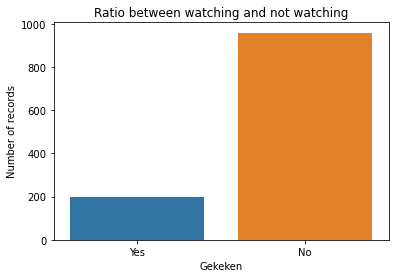

In [25]:
sns.countplot(x="Gekeken", data=df_combi)
plt.title('Ratio between watching and not watching')
plt.xlabel('Gekeken')
plt.ylabel('Number of records')
plt.show()


What is striking is that there are many more days in the dataset on which I have not watched Netflix.

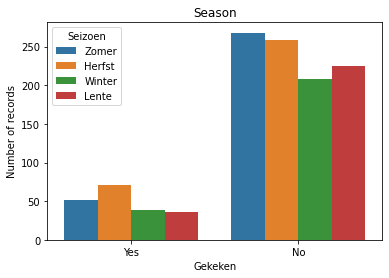

In [26]:
sns.countplot(x="Gekeken", hue="Seizoen", data=df_combi)
plt.title('Season')
plt.xlabel('Gekeken')
plt.ylabel('Number of records')
plt.show()


Here you can see the relationship between the different seasons. The differences are small, but in the fall I watched Netflix the most.

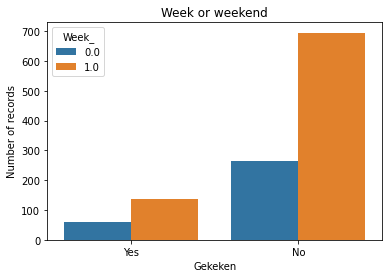

In [27]:
sns.countplot(x="Gekeken", hue="Week_", data=df_combi)
plt.title('Week or weekend')
plt.xlabel('Gekeken')
plt.ylabel('Number of records')
plt.show()


Here you can see the difference between viewed during the week and at the weekend. However, it should be taken into account that more days fall during the week than on weekends. I watch more Netflix during the week than on the weekend.

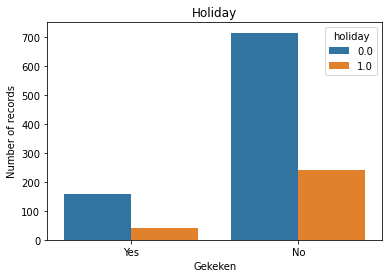

In [28]:
sns.countplot(x="Gekeken", hue="holiday", data=df_combi)
plt.title('Holiday')
plt.xlabel('Gekeken')
plt.ylabel('Number of records')
plt.show()


Here you can see the difference between viewing behavior during the holiday and outside it. Here, too, it must be taken into account that more days fall outside the holiday. I look more outside the holidays.

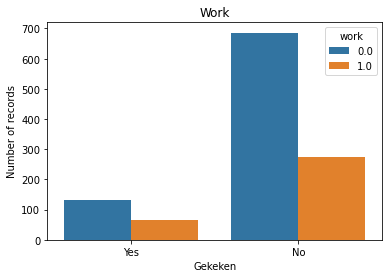

In [29]:
sns.countplot(x="Gekeken", hue="work", data=df_combi)
plt.title('Work')
plt.xlabel('Gekeken')
plt.ylabel('Number of records')
plt.show()


Here you can see the difference between the days I worked at Lidl or not. These are 2 days a week. Here too I look more at days when I am not working.

## Numerical values

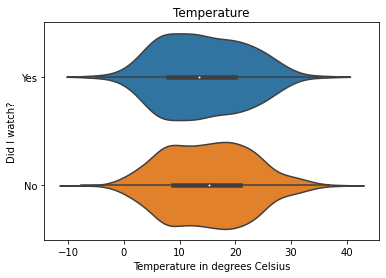

In [30]:
sns.violinplot(y="Gekeken", x="temperatuur",data=df_combi)
plt.title('Temperature')
plt.xlabel('Temperature in degrees Celsius')
plt.ylabel('Did I watch?')
plt.show()


When the temperature reaches around 20 degrees, I will watch a little less Netflix.

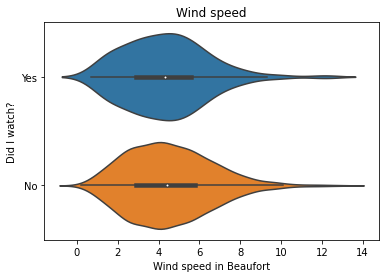

In [31]:
sns.violinplot(y="Gekeken", x="windsnelheid",data=df_combi)
plt.title('Wind speed')
plt.xlabel('Wind speed in Beaufort')
plt.ylabel('Did I watch?')
plt.show()

Here is a very small difference, which suggests that I am going to watch a little more netflix during force 4-6.

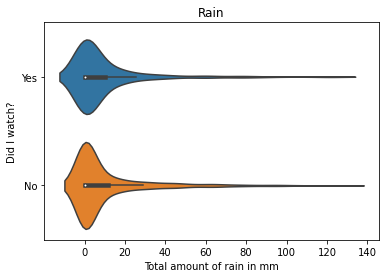

In [32]:
sns.violinplot(y="Gekeken", x="Neerslagintensiteit_clean",data=df_combi)
plt.title('Rain')
plt.xlabel('Total amount of rain in mm')
plt.ylabel('Did I watch?')
plt.show()

There are many days in the dataset where it does not rain, which can be seen here. The difference is nil with a little more looking at rain.

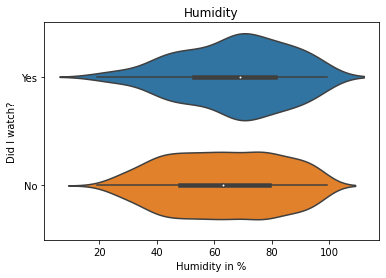

In [33]:
sns.violinplot(y="Gekeken", x="relatieve vochtigheid",data=df_combi)
plt.title('Humidity')
plt.xlabel('Humidity in %')
plt.ylabel('Did I watch?')
plt.show()

The biggest difference can be seen in the relative humidity. Between 60 and 80 percent I watch more Netflix.

## Get an overview over the correlations

In [34]:
df_combi = df_combi[["Week_","Spring","Summer","Autumn","Winter","holiday","work","temperatuur","windsnelheid","relatieve vochtigheid","Neerslagintensiteit_clean","Gekeken"]]
corr = df_combi.corr()
corr

,Week_,Spring,Summer,Autumn,Winter,holiday,work,temperatuur,windsnelheid,relatieve vochtigheid,Neerslagintensiteit_clean
Week_,1.000000,0.008883,-0.008055,-0.000314,0.000069,0.013781,-0.296258,-0.000495,-0.047662,0.003498,-0.052346
Spring,0.008883,1.000000,-0.333381,-0.340607,-0.281498,-0.235284,0.004155,-0.039751,0.106661,-0.300404,-0.038051
Summer,-0.008055,-0.333381,1.000000,-0.389384,-0.321810,0.409158,-0.004240,0.628042,-0.113181,-0.299778,-0.070321
Autumn,-0.000314,-0.340607,-0.389384,1.000000,-0.328785,-0.211977,0.000376,-0.054262,-0.052441,0.227418,0.015619
Winter,0.000069,-0.281498,-0.321810,-0.328785,1.000000,0.027152,-0.000028,-0.584604,0.072358,0.382974,0.098303
holiday,0.013781,-0.235284,0.409158,-0.211977,0.027152,1.000000,0.006637,0.278584,-0.070642,-0.137455,-0.055083
work,-0.296258,0.004155,-0.004240,0.000376,-0.000028,0.006637,1.000000,-0.008849,0.015335,0.038336,0.038385
temperatuur,-0.000495,-0.039751,0.628042,-0.054262,-0.584604,0.278584,-0.008849,1.000000,-0.128160,-0.637880,-0.168073
windsnelheid,-0.047662,0.106661,-0.113181,-0.052441,0.072358,-0.070642,0.015335,-0.128160,1.000000,0.038569,0.240270
relatieve vochtigheid,0.003498,-0.300404,-0.299778,0.227418,0.382974,-0.137455,0.038336,-0.637880,0.038569,1.000000,0.378628


The above is the correlation matrix, here you can see which values have the strongest mutual correlation. Since "Gekeken" is my Y variable you have to look in that row to see which other variables this has the most correlation with. I have to take into account that the seasons are dummy variables, so I can only use one of them.

The 6 variables I'm going to use because they have the highest correlation are: "Autumn", "Work", "relatieve vochtigheid", "holiday", "windsnelheid" and "temperatuur"

The correlation indicates how very different variables are interrelated. A correlation between 0.00 and 0.29 is considered weak. 0.30 to 0.69 as moderate and from 0.70 it is seen as strong (Spsshandboek.nl, W.D.). 

In the above correlation matrix it can be seen that the highest usable correlation is 0.075, which means that all correlations are classified as weak.

This will result in a low precision model. But this will be discussed in the conclusion section.

# Predictive model & Evaluation

Both algorithms can be used in this assignment. That's why I decided to use both and then choose which model gave the best outcome. In addition, the correlations between the X and Y values were very low. In many cases there was not a single good prediction that gave all the more reason to look a little further.

The models I used are KNN and random forest. After each try I did a evaluation. The Evaluation of the model with the best outcome is presented in the conclusion part. 



## KNN

KNN is an algorithm to predict or classify. In this case I'm using to predict if I've watched Netflix. KNN compares a predictable value with a number of nearest neighbors. You define this number of neighbors by the height of K. If you enter 3, you look at the three nearest neighbors. In this case, I make 3 attempts and choose the one with the highest KNN score.

In [35]:
# Select the X and Y variables, the Y is what I'm gonna predict and the X is used to predict.
X = df_combi[["Autumn","work","relatieve vochtigheid","holiday","windsnelheid","temperatuur"]] 
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df_combi['Gekeken']

# Split the data in a test and a trainings dataset.They are stored in different variables.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3) 


I will try 3 differnt values for K and look which one has the best outcomes

### KNN K=5

In [36]:
# K = 5, defauld

# Call the algoritm and set a number of neighbors
knn = KNeighborsClassifier(n_neighbors=5) 

# Select the data to use in the model.
knn = knn.fit(X_train, y_train) 

#Calculate the accurancy
knn.score(X_test, y_test)



0.8040345821325648

In [37]:
# Make a variable for the predicted outcomes
y_test_pred = knn.predict(X_test) 

# Create a cufusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Show the confusion matrix in table with titles
conf_matrix_knn = pd.DataFrame(cm, index=['No_actual', 'Yes_actual'], columns = ['No_predicted', 'Yes_predicted']) 
conf_matrix_knn

,No_predicted,Yes_predicted
No_actual,277,7
Yes_actual,61,2


In [38]:
# Print a classification report, in this way I can compare different models.
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.82      0.98      0.89       284
         Yes       0.22      0.03      0.06        63

    accuracy                           0.80       347
   macro avg       0.52      0.50      0.47       347
weighted avg       0.71      0.80      0.74       347



### KNN K=14

In [39]:
# K = 14

# Call the algoritm and set a number of neighbors
knn = KNeighborsClassifier(n_neighbors=14) 

# Select the data to use in the model.
knn = knn.fit(X_train, y_train) 

#Calculate the accurancy
knn.score(X_test, y_test) 



0.8184438040345822

In [40]:
# Make a variable for the predicted outcomes
y_test_pred = knn.predict(X_test) 

# Create a cufusion matrix
cm = confusion_matrix(y_test, y_test_pred) 

# Show the confusion matrix in table with titles
conf_matrix_knn = pd.DataFrame(cm, index=['No_actual', 'Yes_actual'], columns = ['No_predicted', 'Yes_predicted']) 
conf_matrix_knn

,No_predicted,Yes_predicted
No_actual,284,0
Yes_actual,63,0


In [41]:
# Print a classification report, in this way I can compare different models.
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.82      1.00      0.90       284
         Yes       0.00      0.00      0.00        63

    accuracy                           0.82       347
   macro avg       0.41      0.50      0.45       347
weighted avg       0.67      0.82      0.74       347



C:\Users\fabio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN K=15

In [42]:
# K = 20

# Call the algoritm and set a number of neighbors
knn = KNeighborsClassifier(n_neighbors=15) 

# Select the data to use in the model.
knn = knn.fit(X_train, y_train) 

#Calculate the accurancy
knn.score(X_test, y_test) 

0.8184438040345822

In [43]:
# Make a variable for the predicted outcomes
y_test_pred = knn.predict(X_test) 

# Create a cufusion matrix
cm = confusion_matrix(y_test, y_test_pred) 


# Show the confusion matrix in table with titles
conf_matrix_knn = pd.DataFrame(cm, index=['No_actual', 'Yes_actual'], columns = ['No_predicted', 'Yes_predicted']) 
conf_matrix_knn

,No_predicted,Yes_predicted
No_actual,284,0
Yes_actual,63,0


In [44]:
# Print a classification report, in this way I can compare different models.
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.82      1.00      0.90       284
         Yes       0.00      0.00      0.00        63

    accuracy                           0.82       347
   macro avg       0.41      0.50      0.45       347
weighted avg       0.67      0.82      0.74       347



C:\Users\fabio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Try random forest algoritm

Random forest is an algorithm that, as the name suggests, consists of several different decision trees. Each tree is trained on a randomly selected part of the dataset. By combining these trees, outliers are prevented from having a negative influence on the model (Totta datalab, 2017).

In [45]:
# Select the X and Y variables, the Y is what I'm gonna predict and the X is used to predict.
X = df_combi[["Autumn","work","relatieve vochtigheid","holiday","windsnelheid","temperatuur"]]
y = df_combi['Gekeken']

# Split the data in a test and a trainings dataset.They are stored in different variables.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Random forest N=40

In [46]:
# Call model and set the number of decion trees
# Because of that random forest a random algoritm is you need to set a random state, now you get the same results all the time
rf = RandomForestClassifier(random_state=1, n_estimators=40) 

# Fit the model
rf = rf.fit(X_train, y_train)

In [47]:
# Make a variable for the predicted outcomes
y_pred = rf.predict(X_test)

# Create a cufusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Show the confusion matrix in table with titles
conf_matrix_rm40 = pd.DataFrame(cm, index=['No', 'Yes'], columns = ['No_p', 'Yes_p']) 
conf_matrix_rm40

,No_p,Yes_p
No,278,10
Yes,55,4


In [48]:
# Print a classification report, in this way I can compare different models.
classification40 = print(classification_report(y_test, y_pred))
classification40

              precision    recall  f1-score   support

          No       0.83      0.97      0.90       288
         Yes       0.29      0.07      0.11        59

    accuracy                           0.81       347
   macro avg       0.56      0.52      0.50       347
weighted avg       0.74      0.81      0.76       347



### Random forest N=100

In [49]:
# Call model and set the number of decion trees
# Because of that random forest a random algoritm is you need to set a random state, now you get the same results all the time
rf = RandomForestClassifier(random_state=1, n_estimators=100) #RF is a random algorithm, so to get the same results we need to use random_state

# Fit the model
rf = rf.fit(X_train, y_train)

In [50]:
# Make a variable for the predicted outcomes
y_pred = rf.predict(X_test)

# Create a cufusion matrix
cm = confusion_matrix(y_test, y_pred)

# Show the confusion matrix in table with titles
conf_matrix_rm100 = pd.DataFrame(cm, index=['No', 'Yes'], columns = ['No_p', 'Yes_p']) 
conf_matrix_rm100

,No_p,Yes_p
No,279,9
Yes,57,2


In [51]:
# Print a classification report, in this way I can compare different models.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.97      0.89       288
         Yes       0.18      0.03      0.06        59

    accuracy                           0.81       347
   macro avg       0.51      0.50      0.48       347
weighted avg       0.72      0.81      0.75       347



### Random forest N=10

In [52]:
# Call model and set the number of decion trees
# Because of that random forest a random algoritm is you need to set a random state, now you get the same results all the time
rf = RandomForestClassifier(random_state=1, n_estimators=10) #RF is a random algorithm, so to get the same results we need to use random_state

# Fit the model
rf = rf.fit(X_train, y_train)

In [53]:
# Make a variable for the predicted outcomes
y_pred = rf.predict(X_test)

# Create a cufusion matrix
cm = confusion_matrix(y_test, y_pred)

# Show the confusion matrix in table with titles
conf_matrix_rm50 = pd.DataFrame(cm, index=['No', 'Yes'], columns = ['No_p', 'Yes_p']) 
conf_matrix_rm50

,No_p,Yes_p
No,271,17
Yes,55,4


In [54]:
# Print a classification report, in this way I can compare different models.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.94      0.88       288
         Yes       0.19      0.07      0.10        59

    accuracy                           0.79       347
   macro avg       0.51      0.50      0.49       347
weighted avg       0.72      0.79      0.75       347



# Conclusion

I have tried 2 algorithms with 3 different values each, to see what will have the best result. The prediction is not very good, this can be explained because the correlations are low. Or while my Netflix viewing behavior cannot be predicted (properly) based on the weather, whether I have worked, whether it is a holiday or weekend. The best result is obtained with the random forest algorithm with an N of 40. This means that 40 decision trees are used.

In [55]:
# The confusion matrix of the best performing model
conf_matrix_rm40

,No_p,Yes_p
No,278,10
Yes,55,4


In [56]:
# Repeat the model to show the result also here
rf = RandomForestClassifier(random_state=1, n_estimators=40)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
conf_matrix_rm40 = pd.DataFrame(cm, index=['No', 'Yes'], columns = ['No_p', 'Yes_p']) 
conf_matrix_rm40
classification40 = print(classification_report(y_test, y_pred))
classification40

              precision    recall  f1-score   support

          No       0.83      0.97      0.90       288
         Yes       0.29      0.07      0.11        59

    accuracy                           0.81       347
   macro avg       0.56      0.52      0.50       347
weighted avg       0.74      0.81      0.76       347



The accurency is the well-predicted data points divided by the total number of data points. In this case this will be:
$Accurency = \frac{278+4}{278+10+55+4} = .82$
This answer is also visible in the classification report. 

Precision is the ratio between the true positives (values that are predicted as yes and are actual also yes) 
and all the other positives. 
True Positives/ (true Positives + False Positives) In this case: 
$Precision = \frac{4}{10 + 4} = .29$
This answer is also visible in the classification report. 

The Recall tells which part of the True positives is predicted correctly. In this case is that:
True positives/ (True positives + False negative)

$recall = \frac{4}{4 + 55} = .07$
This answer is also visible in the classification report. 

In [57]:
# Percentage correct if I predict all the times Yes
yes = df_combi[(df_combi['Gekeken'] == 'Yes')].count()
no = df_combi[(df_combi['Gekeken'] == 'No')].count()
percentage = (yes)/(yes+no)*100
percentage["Gekeken"]

17.041522491349482

The precision is 12 percent higher than if I would not use a model and would always predict yes. This is progress but far too low to have any practical value. This can be explained by the low correlations. This means that there is little connection between my viewing habits and the weather. If the weather is not so good, I will not suddenly watch much more Netflix.

<b>References</b>

Spsshandboek.nl. (W.D.). Correlatie. Retrieved January 18, 2021, from Spsshandboek.nl: https://spsshandboek.nl/correlatie/
Totta datalab. (2017, May 4). Random forest: wat is het en hoe werkt het? Retrieved Januari 19, 2021, from Totta datalab: https://www.tottadatalab.nl/2017/05/04/random-forest/

